In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
import warnings
import re
import string
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

warnings.filterwarnings('ignore')

## Read Files

In [2]:

df = pd.read_csv('Data/covid_data_FULL.csv')
df_usa = pd.read_csv('Data/covid_data_USA.csv')
# df = df.head(1000)
# print(df.info())
# df_usa.info()

In [3]:
# df.head()

In [4]:
## load stopwords
stopwords = nltk.corpus.stopwords.words('english')

## Clean and tokenize tweets

In [5]:
def clean_text(text):
    ## remove characters without english letter
    clean_text = re.sub('[^a-zA-Z]+',' ',text)
    return clean_text.lower()

def tokenize(text):
    # first tokenize by word 
    tokens = [word for word in nltk.word_tokenize(text)]
    tokens = [word for word in tokens if len(word)>2]
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

In [6]:
# df['tokens'] = df['clean_text'].apply(lambda x: clean_text(x))
df['tokens'] = df['clean_text'].apply(lambda x: tokenize(clean_text(x)))
df_usa['tokens'] = df_usa['original_text'].apply(lambda x: tokenize(clean_text(x)))
# df.head()
# df_usa.head()

In [7]:
# df_usa.info()

In [8]:
# df_usa.to_csv('Twitter_data/Data/df_usa_reopen_wordcloud.csv', index=False)

In [9]:
  

tweet_dict = {}

for words in df.tokens:
    for word in words:
        if word not in tweet_dict:
            tweet_dict[word] = 1
        else:
            tweet_dict[word] += 1
            

tweet_dict_usa = {}

for words in df_usa.tokens:
    for word in words:
        if word not in tweet_dict_usa:
            tweet_dict_usa[word] = 1
        else:
            tweet_dict_usa[word] += 1

In [10]:
stopwords = set(STOPWORDS)
# stopwords.add("said")

## Remove custom stop words

In [11]:
entries = ['https', 'amp']

for key in entries:
    if key in tweet_dict:
        del tweet_dict[key]

for key in entries:
    if key in tweet_dict_usa:
        del tweet_dict_usa[key]

## Word Cloud

(-0.5, 991.5, 965.5, -0.5)

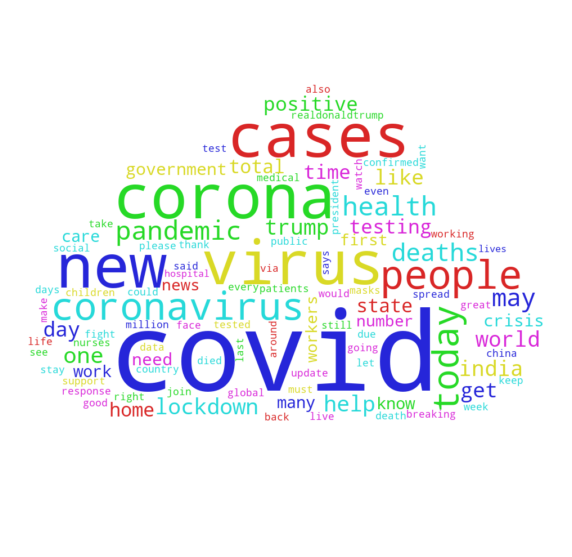

In [12]:


cloud_mask = np.array(Image.open("img/cloud.jpg"))

def my_tf_color_func(dictionary):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(%d, 70%%, 50%%)" % (60 * dictionary[word])
    return my_tf_color_func_inner



wc = WordCloud(max_words=100, background_color="white", stopwords=stopwords, 
               mask=cloud_mask, width=1987, height=736)
wc.generate_from_frequencies(frequencies=tweet_dict)
# wc.generate(full_words)
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=my_tf_color_func(tweet_dict)), interpolation="bilinear")
plt.axis("off")
# plt.savefig('plots/wordcloud.png')

(-0.5, 991.5, 965.5, -0.5)

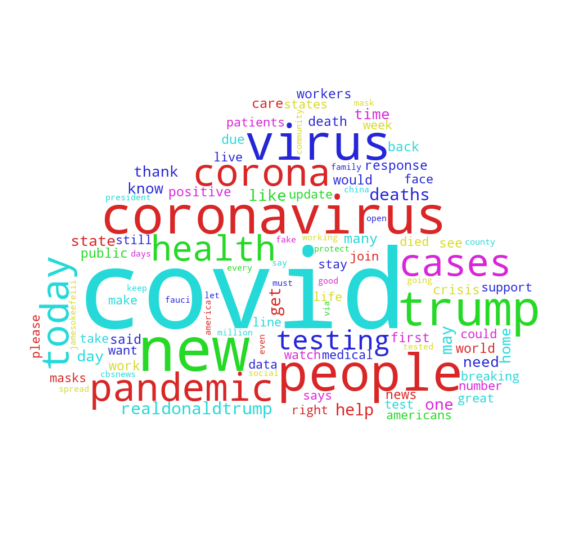

In [13]:

wc = WordCloud(max_words=100, background_color="white", stopwords=stopwords, 
               mask=cloud_mask, width=1987, height=736)
wc.generate_from_frequencies(frequencies=tweet_dict_usa)
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=my_tf_color_func(tweet_dict_usa)), interpolation="bilinear")
plt.axis("off")
# plt.savefig('plots/wordcloud_usa.png')

## Only Reopen wordcloud

In [14]:
# df_usa.info()


In [15]:
# df_usa.head()

In [16]:
tweet_dict_usa_reopen = {}

for words in df_usa.tokens:
    if 'reopen' in words or 're-open' in words or '#reopen' in words:
        for word in words:
            if word not in tweet_dict_usa_reopen:
                tweet_dict_usa_reopen[word] = 1
            else:
                tweet_dict_usa_reopen[word] += 1

In [17]:
entries = ['https', 'amp', 'ups', 'wfla']

for key in entries:
    if key in tweet_dict_usa_reopen:
        del tweet_dict_usa_reopen[key]

(-0.5, 991.5, 965.5, -0.5)

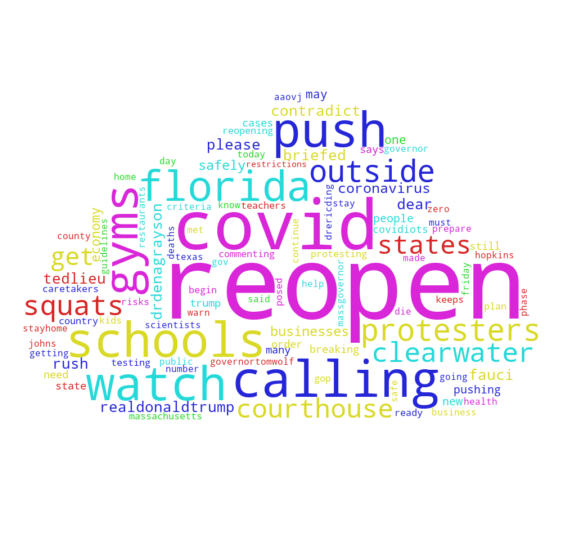

In [18]:

wc = WordCloud(max_words=100, background_color="white", stopwords=stopwords, 
               mask=cloud_mask, width=1987, height=736)
wc.generate_from_frequencies(frequencies=tweet_dict_usa_reopen)
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=my_tf_color_func(tweet_dict_usa_reopen)), interpolation="bilinear")
plt.axis("off")
# plt.savefig('plots/wordcloud_usa_reopen.png')